### Importes Básicos

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import math

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots your sample against a Normal distribution, 
# to see whether your sample is normally distributed or not

#Showing only 2 decimals
pd.options.display.float_format = "{:,.2f}".format

Criação do Dataframe

In [2]:
df = pd.read_csv('NBA_database.csv', index_col=0)
df

Team  Season            Player  Age   G    GS    MP   FG   FGA  FG%  \
0      MIA    2024       Bam Adebayo   26  71 71.00  2416  530  1017 0.52   
1      MIA    2024  Jaime Jaquez Jr.   22  75 20.00  2113  341   697 0.49   
2      MIA    2024      Jimmy Butler   34  60 60.00  2042  396   793 0.50   
3      MIA    2024   Duncan Robinson   29  68 36.00  1905  304   675 0.45   
4      MIA    2024      Caleb Martin   28  64 23.00  1756  241   559 0.43   
...    ...     ...               ...  ...  ..   ...   ...  ...   ...  ...   
22677  HOU    1980      John Shumate   27  29   NaN   332   34    64 0.53   
22678  HOU    1980      Dwight Jones   27  21   NaN   278   50   119 0.42   
22679  HOU    1980      Paul Mokeski   23  12   NaN   113   11    33 0.33   
22680  HOU    1980        Rudy White   26   9   NaN   106   13    24 0.54   
22681  HOU    1980    Alonzo Bradley   26  22   NaN    96   17    48 0.35   

        3P  3PA  3P%   2P  2PA  2P%  eFG%   FT  FTA  FT%  ORB  DRB  TRB  AST  \
0       15   42 0.36  515  975 0.53  0.53  292  387 0.76  159  578  737  278   
1       65  202 0.32  276  495 0.56  0.54  142  175 0.81   82  203  285  195   
2       60  145 0.41  336  648 0.52  0.54  394  459 0.86  105  213  318  298   
3      187  473 0.40  117  202 0.58  0.59   80   90 0.89   15  158  173  192   
4       81  232 0.35  160  327 0.49  0.50   77   99 0.78   74  207  281  143   
...    ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
22677    0    0  NaN   34   64 0.53  0.53   33   44 0.75   25   54   79   23   
22678    0    0  NaN   50  119 0.42  0.42   27   36 0.75   31   41   72   11   
22679    0    0  NaN   11   33 0.33  0.33    7    9 0.78   14   15   29    2   
22680    0    0  NaN   13   24 0.54  0.54   10   13 0.77    0    9    9    5   
22681    1    1 1.00   16   47 0.34  0.36    6    9 0.67    2    4    6    3   

       STL  BLK  TOV   PF   PTS  
0       81   66  162  159  1367  
1       77   20  110  167   889  
2       79   17  102   68  1246  
3       46   16   95  163   875  
4       47   29   77  126   640  
...    ...  ...  ...  ...   ...  
22677    8    9   27   39   101  
22678    4    5   20   48   127  
22679    1    6   10   24    29  
22680    5    0    8    8    36  
22681    3    0    8    9    41  

[21716 rows x 29 columns]

Elminação de Na

In [3]:
df = df.fillna(0)

# Tratamento inicial dos dados

## Defininado jogadores com minutagem relevante

Nos últimos 45 anos a regra da NBA foi de que cada time jogaria 82 vezes, entretanto tivemos 4 tempordas que não contaram com esse número de jogos por time

1) **1999** -> Temporada com apenas 50 jogos por conta de problemas nas negociações salariais

2) **2012** -> Temporada com apenas 66 jogos por conta de problemas nas negociações salariais

3) **2020** -> Temporada com apenas 72 jogos por conta da COVID-19

4) **2021** -> Temporada com apenas 72 jogos por conta da COVID-19

### Número de jogos por times

In [4]:
games_per_seasonb_= (df.groupby('Season').sum()['MP'] #-> total de minutos jogados
         /df.groupby('Season').nunique()['Team'] #-> Número de times por temporada
         /5 #-> jogadores em quadra
         /48)

print(games_per_seasonb_.sort_values()[0:6])
games_season_dict = games_per_seasonb_.to_dict()

Season
1999   50.38
2012   66.54
2020   71.12
2021   72.43
1994   82.38
1988   82.43
dtype: float64


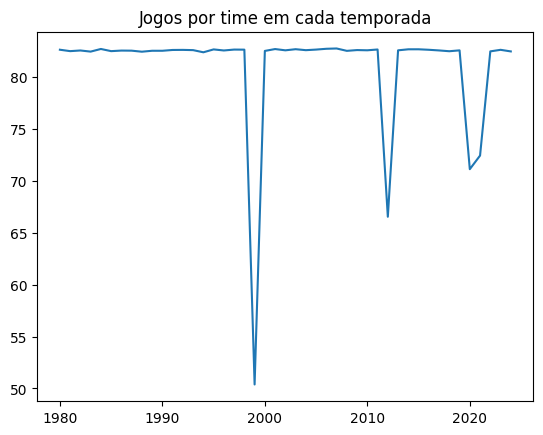

In [5]:
plt.plot(df.groupby('Season').sum()['MP'] #-> total de minutos jogados
         /df.groupby('Season').nunique()['Team'] #-> Número de times por temporada
         /5 #-> jogadores em quadra
         /48 #-> minutos por jogo
        )
plt.title("Jogos por time em cada temporada");




**Além disse o número de times por temporada tambvém foi diferente nos últimos anos**



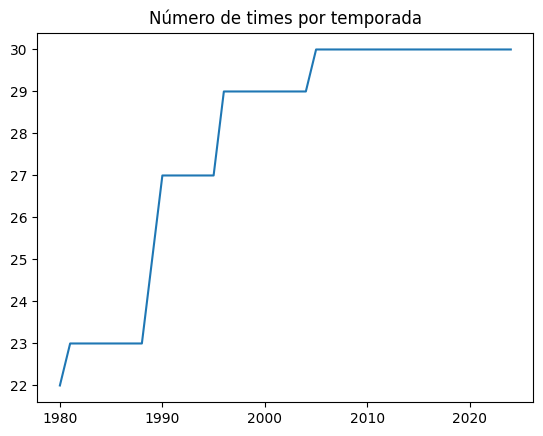

In [6]:
plt.plot(df.groupby('Season').nunique()['Team']) #-> Número de times por temporada)
plt.title("Número de times por temporada");

### Unificação dos jogadores que jogaramem mais de um clube

Alguns jogadores jogam em mais de um clube em uma temporada

Para um analise de agrupamento é melhor juntar a temporada em diferentes clubes como em uma só

In [7]:
df = df.groupby(['Season', 'Player'],as_index=False).sum()

 Por conta do Group By as estatíticas de FG%, 3P%, FT% e eFG% precisam re recalculadas

In [8]:
#Corrigindo as estatísticas que ficaram erradas
df['FG%'] = df['FG'] / df['FGA']
df['3P%'] = df['3P'] / df['3PA']
df['2P%'] = df['2P'] / df['2PA']
df['FT%'] = df['FT'] / df['FTA']
df['eFG%'] = (df['FG'] + 0.5 * df['3P'])/ df['FGA']

In [9]:
df = df.fillna(0)

### Validação dos jogadores com minutagem significativa

Para selecionar apenas os jogadores com minutagem relevantes vamos agrupar as temporadas e buscar o pareto de minutagem por número de jogadores

In [10]:
df = df.sort_values(['Season', 'MP'], ascending=[True, False])

In [11]:
# Criação das colunas de apoio para selecionar jogadores de minutagem relevante
df['aux'] = 1
df['MP_Season_cumsum'] = df.groupby('Season')['MP'].transform(lambda x: x.cumsum() / x.sum())
df['%_Season_players'] = df.groupby('Season')['aux'].transform(lambda x: x.cumsum() / x.sum())
df.drop(columns='aux', inplace=True)
df

Season               Player  Age    G    GS    MP   FG   FGA  FG%  3P  \
95       1980       George Johnson   54  156  0.00  4057  557  1192 0.47   2   
199      1980           Norm Nixon   24   82 82.00  3226  624  1209 0.52   1   
84       1980          Elvin Hayes   34   81  0.00  3183  761  1677 0.45   3   
18       1980      Bill Cartwright   22   82 82.00  3150  665  1215 0.55   0   
151      1980  Kareem Abdul-Jabbar   32   82  0.00  3143  835  1383 0.60   0   
...       ...                  ...  ...  ...   ...   ...  ...   ...  ...  ..   
19037    2024       Jalen Crutcher   24    1  0.00     3    0     1 0.00   0   
19184    2024      Malcolm Cazalon   22    1  0.00     3    0     0 0.00   0   
18951    2024    Dmytro Skapintsev   25    2  0.00     2    0     1 0.00   0   
19065    2024        Javonte Smart   24    1  0.00     1    0     0 0.00   0   
19122    2024       Justin Jackson   28    2  0.00     1    0     0 0.00   0   

       3PA  3P%   2P   2PA  2P%  eFG%   FT  FTA  FT%  ORB  DRB   TRB  AST  \
95      10 0.20  555  1182 0.47  0.47  237  315 0.75  382  804  1186  330   
199      8 0.12  623  1201 0.52  0.52  197  253 0.78   52  177   229  642   
84      13 0.23  758  1664 0.46  0.45  334  478 0.70  269  627   896  129   
18       0 0.00  665  1215 0.55  0.55  451  566 0.80  194  532   726  165   
151      1 0.00  835  1382 0.60  0.60  364  476 0.76  190  696   886  371   
...    ...  ...  ...   ...  ...   ...  ...  ...  ...  ...  ...   ...  ...   
19037    0 0.00    0     1 0.00  0.00    0    0 0.00    0    0     0    0   
19184    0 0.00    0     0 0.00  0.00    0    0 0.00    0    0     0    0   
18951    0 0.00    0     1 0.00  0.00    0    0 0.00    0    0     0    0   
19065    0 0.00    0     0 0.00  0.00    0    0 0.00    0    0     0    0   
19122    0 0.00    0     0 0.00  0.00    0    0 0.00    0    0     0    0   

       STL  BLK  TOV   PF   PTS  MP_Season_cumsum  %_Season_players  
95     137  325  347  572  1353              0.01              0.00  
199    147   14  288  241  1446              0.02              0.01  
84      62  189  215  309  1859              0.02              0.01  
18      48  101  222  279  1781              0.03              0.01  
151     81  280  297  216  2034              0.04              0.02  
...    ...  ...  ...  ...   ...               ...               ...  
19037    0    0    0    0     0              1.00              0.99  
19184    0    0    0    0     0              1.00              0.99  
18951    0    0    0    0     0              1.00              1.00  
19065    0    0    0    0     0              1.00              1.00  
19122    0    0    0    0     0              1.00              1.00  

[19375 rows x 30 columns]

### Gráfico de pareto por temporada

Explorando a base de dados vemos que 80% dos minutos são jogados por apenas 44% dos jogadores

In [12]:
import math

season = df['Season'].unique()
dfnrows = math.ceil(len(season)/2)

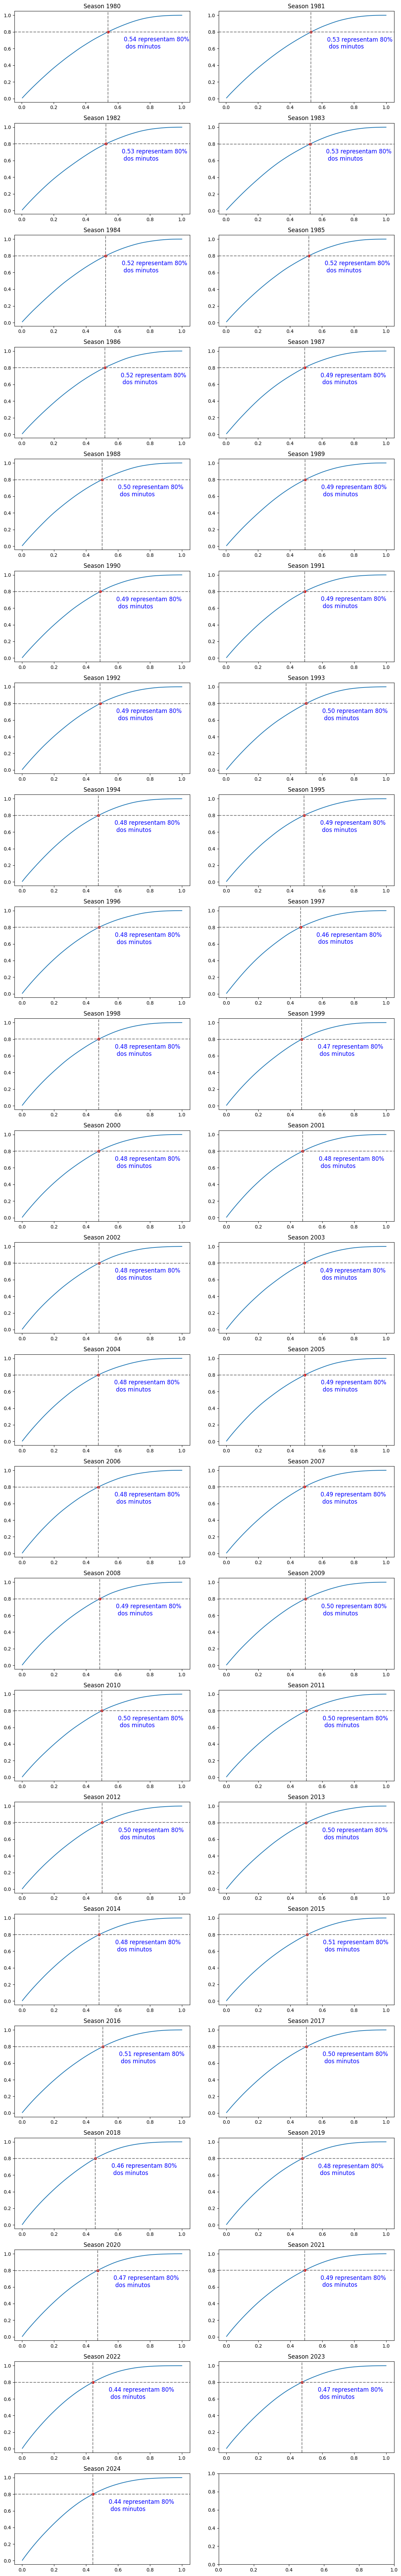

In [13]:
fig, axs = plt.subplots(nrows=dfnrows,ncols =2, figsize=(12, 75))
for n, i in  enumerate(season):
    
    # Definindo qual será o eixo do gráfico
    row = n // 2
    col_idx = n % 2
    
    # Plotando o gráfico
    temp_df = df[df['Season'] == int(i)]
    axs[row, col_idx].plot(temp_df['%_Season_players'], temp_df['MP_Season_cumsum'])
    axs[row, col_idx].set_title(f'Season {i}')  # Adiciona um título para cada subplot
    
    # Definindo quem representa o 80# dos minutos
    _80_ = temp_df.iloc[(temp_df['MP_Season_cumsum']-0.8).abs().argsort()[:1]]
    
    #Adicionando o ponto de esquilíbrio e adicionando marcadores
    axs[row, col_idx].plot(_80_['%_Season_players'], _80_['MP_Season_cumsum'], color='red', marker ='p')
    axs[row, col_idx].axvline(x=_80_['%_Season_players'].values[0], color='gray', linestyle='--')  # Linha vertical
    axs[row, col_idx].axhline(y=_80_['MP_Season_cumsum'].values[0], color='gray', linestyle='--')
    
    #Adicionando texto nos gráficos
    axs[row, col_idx].text(
        _80_['%_Season_players'].values[0] + 0.1,  # Posição no eixo x (levemente deslocada para a direita)
        _80_['MP_Season_cumsum'].values[0] - 0.2,  # Posição no eixo y (levemente deslocada para cima)
        f"{_80_['%_Season_players'].values[0]:.2f} representam 80% \n dos minutos",  # Texto a ser exibido
        fontsize=12,
        color='blue'
    )
    
plt.tight_layout()  # Ajusta o layout para não sobrepor elementos
plt.show()

Selecionando apenas os jagadores com minutagens significativas

In [14]:
df = df[df['MP_Season_cumsum']<0.8].copy()
df.drop(columns='%_Season_players', inplace = True)
df.drop(columns='MP_Season_cumsum', inplace = True)

## Tratado as tentativas de 3 pontos

Jogadores com muitas poucas tentatvas de bolas de 3 podem ter outliers por conta do baixo número de tentativas de bolas de 3

Para definir o corte de número de bolas tentadas, foram testados 2 métodos

### Testando o pareto pra entender o perfil dos chutes de  3 nos últimos anos

In [15]:
df = df.sort_values(['Season', '3PA'], ascending=[True, False])

In [16]:
df['aux'] = 1
df['3PA_Season_cumsum'] = df.groupby('Season')['3PA'].transform(lambda x: x.cumsum() / x.sum())
df['%_Season_players'] = df.groupby('Season')['aux'].transform(lambda x: x.cumsum() / x.sum())
df.drop(columns='aux', inplace=True)
df

Season                Player  Age   G    GS    MP   FG   FGA  FG%  3P  \
38       1980          Brian Taylor   28  78  0.00  2754  418   895 0.47  90   
225      1980            Rick Barry   35  72  0.00  1816  325   771 0.42  73   
51       1980            Chris Ford   31  73 73.00  2115  330   709 0.47  70   
195      1980           Mike Newlin   31  78  0.00  2510  611  1329 0.46  45   
160      1980            Larry Bird   23  82 82.00  2955  693  1463 0.47  58   
...       ...                   ...  ...  ..   ...   ...  ...   ...  ...  ..   
19146    2024          Kevon Looney   27  74 36.00  1195  139   233 0.60   0   
19337    2024  Trayce Jackson-Davis   23  68 16.00  1130  233   332 0.70   0   
18913    2024        Daniel Gafford   50  74 66.00  1815  348   480 0.72   0   
19015    2024           Ivica Zubac   26  68 68.00  1794  337   519 0.65   0   
19035    2024          Jakob Poeltl   28  50 50.00  1319  248   378 0.66   0   

       3PA  3P%   2P   2PA  2P%  eFG%   FT  FTA  FT%  ORB  DRB  TRB  AST  STL  \
38     239 0.38  328   656 0.50  0.52  130  162 0.80   76  112  188  335  147   
225    221 0.33  252   550 0.46  0.47  143  153 0.93   53  183  236  268   80   
51     164 0.43  260   545 0.48  0.51   86  114 0.75   77  104  181  215  111   
195    152 0.30  566  1177 0.48  0.48  367  415 0.88  101  163  264  314  115   
160    143 0.41  635  1320 0.48  0.49  301  360 0.84  216  636  852  370  143   
...    ...  ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
19146    1 0.00  139   232 0.60  0.60   56   83 0.67  143  276  419  133   28   
19337    1 0.00  233   331 0.70  0.70   74  132 0.56  135  206  341   82   29   
18913    0 0.00  348   480 0.72  0.72  118  175 0.67  195  367  562  115   65   
19015    0 0.00  337   519 0.65  0.65  120  166 0.72  196  430  626   93   22   
19035    0 0.00  248   378 0.66  0.66   59  107 0.55  146  283  429  127   35   

       BLK  TOV   PF   PTS  3PA_Season_cumsum  %_Season_players  
38      25  141  246  1056               0.06              0.01  
225     28  152  182   866               0.12              0.01  
51      27  105  178   816               0.16              0.02  
195      4  231  195  1634               0.20              0.03  
160     53  263  279  1745               0.23              0.03  
...    ...  ...  ...   ...                ...               ...  
19146   29   50  155   334               1.00              0.98  
19337   76   49  108   540               1.00              0.99  
18913  153   74  227   814               1.00              0.99  
19015   83   79  180   794               1.00              1.00  
19035   76   77  149   555               1.00              1.00  

[9446 rows x 30 columns]

In [17]:
import math

season = df['Season'].unique()
dfnrows = math.ceil(len(season)/2)

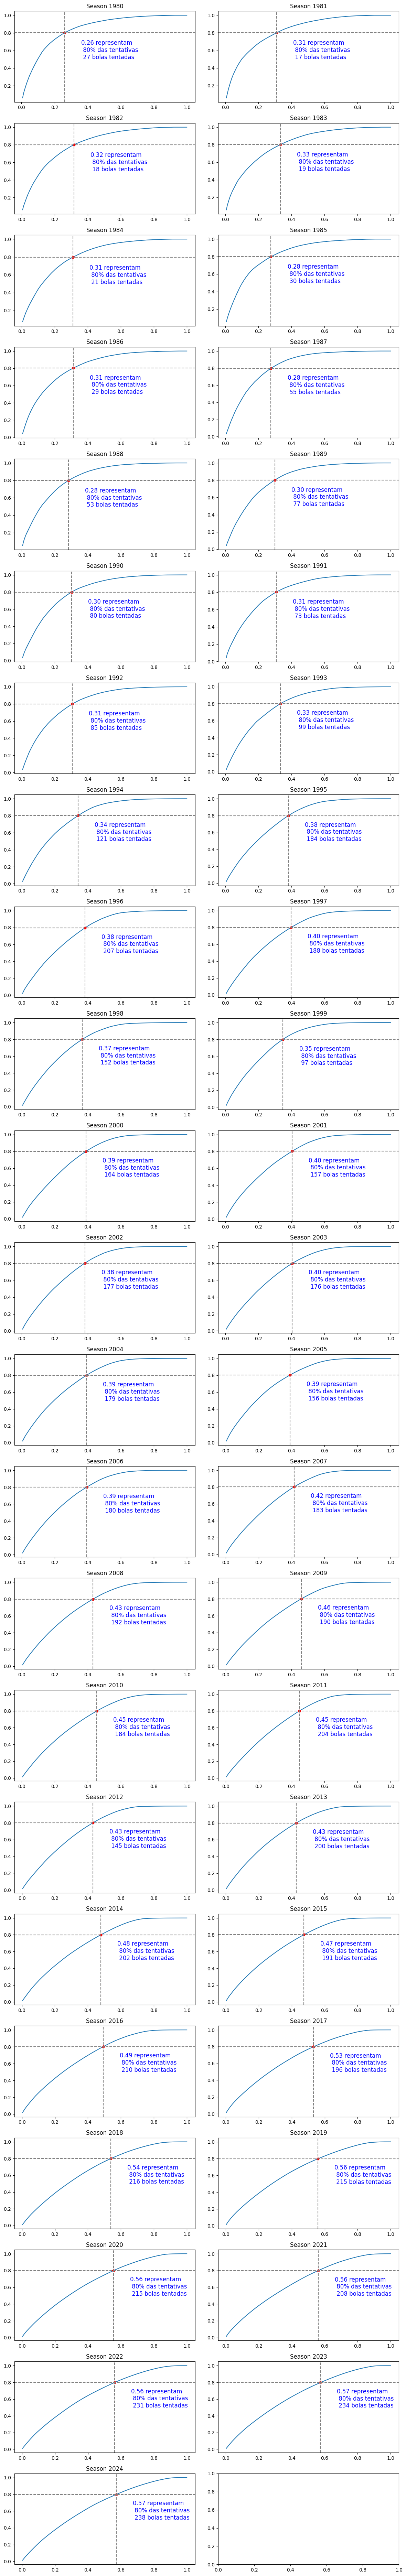

In [18]:
fig, axs = plt.subplots(nrows=dfnrows,ncols =2, figsize=(12, 75))
for n, i in  enumerate(season):
    
    # Definindo qual será o eixo do gráfico
    row = n // 2
    col_idx = n % 2
    
    # Plotando o gráfico
    temp_df = df[df['Season'] == int(i)]
    axs[row, col_idx].plot(temp_df['%_Season_players'], temp_df['3PA_Season_cumsum'])
    axs[row, col_idx].set_title(f'Season {i}')  # Adiciona um título para cada subplot
    
    # Definindo quem representa o 80# dos minutos
    _80_ = temp_df.iloc[(temp_df['3PA_Season_cumsum']-0.8).abs().argsort()[:1]]
    
    #Adicionando o ponto de esquilíbrio e adicionando marcadores
    axs[row, col_idx].plot(_80_['%_Season_players'], _80_['3PA_Season_cumsum'], color='red', marker ='p')
    axs[row, col_idx].axvline(x=_80_['%_Season_players'].values[0], color='gray', linestyle='--')  # Linha vertical
    axs[row, col_idx].axhline(y=_80_['3PA_Season_cumsum'].values[0], color='gray', linestyle='--')
    
    #Adicionando texto nos gráficos
    axs[row, col_idx].text(
        _80_['%_Season_players'].values[0] + 0.1,  # Posição no eixo x (levemente deslocada para a direita)
        _80_['3PA_Season_cumsum'].values[0] - 0.3,  # Posição no eixo y (levemente deslocada para cima)
        f"{_80_['%_Season_players'].values[0]:.2f} representam \n 80% das tentativas\n {_80_['3PA'].values[0]} bolas tentadas",  # Texto a ser exibido
        fontsize=12,
        color='blue'
    )
    
plt.tight_layout()  # Ajusta o layout para não sobrepor elementos
plt.show()

In [19]:
df.drop(columns='%_Season_players', inplace = True)
df.drop(columns='3PA_Season_cumsum', inplace = True)

### Eliminação 1 a 1 para checar em ponto a curva de bola 3P% normaliza

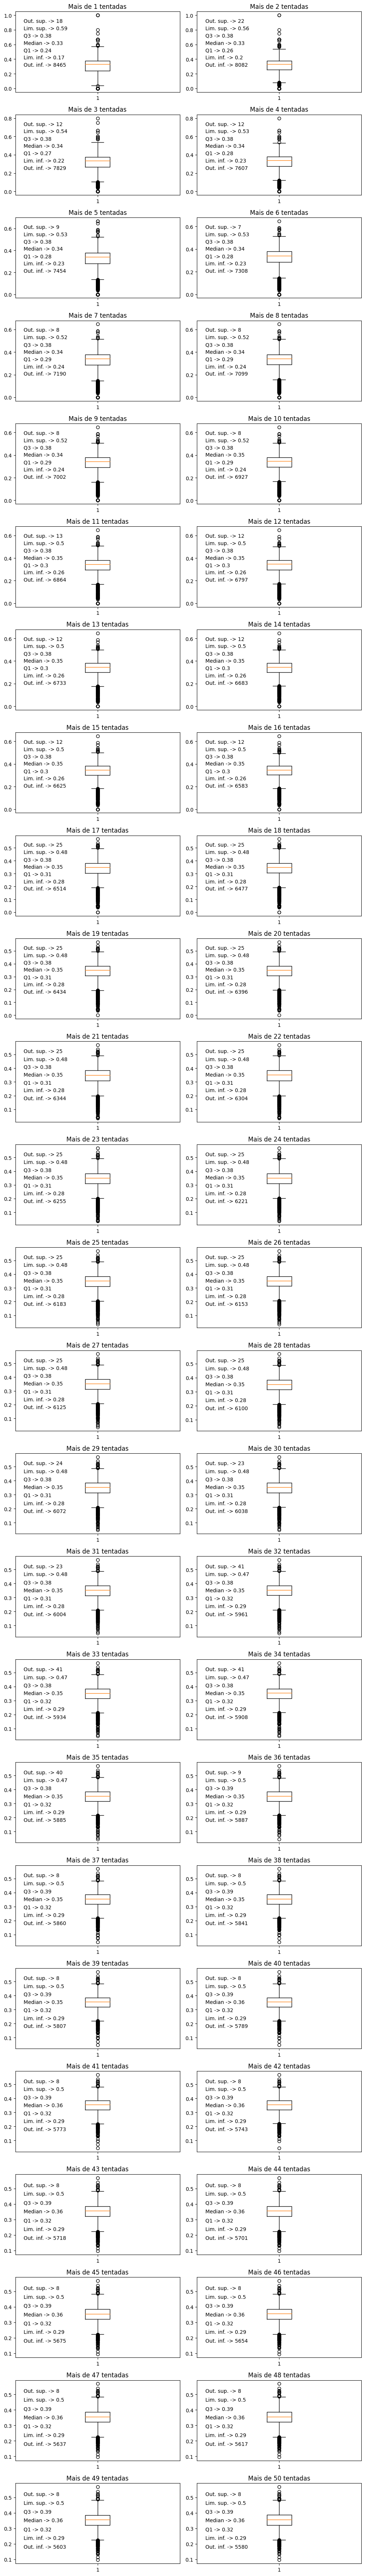

In [20]:
fig, axs = plt.subplots(nrows=25, ncols=2, figsize=(10, 70))
for n, _3pa_ in enumerate(np.arange(1,51)):
    
    #Descrevendo o eixo
    row = n // 2
    col_idx = n % 2
    
    #Criação de uma DF temporária
    temp_df = df[df['3PA'] > _3pa_]
    
    #Criação dos gráficos
    axs[row, col_idx].boxplot(temp_df['3P%'])
    axs[row, col_idx].set_title(f'Mais de {_3pa_} tentadas')
    
    #Calculando dados do boxplot
    q1 = round(temp_df['3P%'].quantile(0.25),2)
    median = round(temp_df['3P%'].quantile(0.50),2)
    q3 = round(temp_df['3P%'].quantile(0.75),2)
    iqr = q3 - q1
    limite_superior = round(q3 + 1.5*iqr,2)
    outliers_superior = temp_df[temp_df['3P%'] > limite_superior]['3P'].count()
    limite_inferior = round(q3 - 1.5*iqr,2)
    outliers_inferior = temp_df[temp_df['3P%'] < limite_superior]['3P'].count()    
    
    # Adicionando texto no gráfico
    col_max = temp_df['3P%'].max()
    axs[row, col_idx].text(0.55,((col_max)-0.1*col_max),f"Out. sup. -> {outliers_superior}")        
    axs[row, col_idx].text(0.55,((col_max)-0.2*col_max),f"Lim. sup. -> {limite_superior}")    
    axs[row, col_idx].text(0.55,((col_max)-0.3*col_max),f"Q3 -> {q3}")
    axs[row, col_idx].text(0.55,((col_max)-0.4*col_max),f"Median -> {median}")
    axs[row, col_idx].text(0.55,((col_max)-0.5*col_max),f"Q1 -> {q1}")
    axs[row, col_idx].text(0.55,((col_max)-0.6*col_max),f"Lim. inf. -> {limite_inferior}")
    axs[row, col_idx].text(0.55,((col_max)-0.7*col_max),f"Out. inf. -> {outliers_inferior}")    
    
plt.tight_layout()  # Ajusta o layout para não sobrepor elementos
plt.show() 

### O Ponto de corte foi de 30 tentativas de bolas de 3

In [21]:
df['3P%'] = np.where(df['3PA'] > 29, df['3P%'], 0 )
df['3P'] = np.where(df['3PA'] > 29, df['3P'], 0 )
df['3PA'] = np.where(df['3PA'] > 29, df['3PA'], 0 )

In [22]:
df.fillna(0)

Season                Player  Age   G    GS    MP   FG   FGA  FG%  3P  \
38       1980          Brian Taylor   28  78  0.00  2754  418   895 0.47  90   
225      1980            Rick Barry   35  72  0.00  1816  325   771 0.42  73   
51       1980            Chris Ford   31  73 73.00  2115  330   709 0.47  70   
195      1980           Mike Newlin   31  78  0.00  2510  611  1329 0.46  45   
160      1980            Larry Bird   23  82 82.00  2955  693  1463 0.47  58   
...       ...                   ...  ...  ..   ...   ...  ...   ...  ...  ..   
19146    2024          Kevon Looney   27  74 36.00  1195  139   233 0.60   0   
19337    2024  Trayce Jackson-Davis   23  68 16.00  1130  233   332 0.70   0   
18913    2024        Daniel Gafford   50  74 66.00  1815  348   480 0.72   0   
19015    2024           Ivica Zubac   26  68 68.00  1794  337   519 0.65   0   
19035    2024          Jakob Poeltl   28  50 50.00  1319  248   378 0.66   0   

       3PA  3P%   2P   2PA  2P%  eFG%   FT  FTA  FT%  ORB  DRB  TRB  AST  STL  \
38     239 0.38  328   656 0.50  0.52  130  162 0.80   76  112  188  335  147   
225    221 0.33  252   550 0.46  0.47  143  153 0.93   53  183  236  268   80   
51     164 0.43  260   545 0.48  0.51   86  114 0.75   77  104  181  215  111   
195    152 0.30  566  1177 0.48  0.48  367  415 0.88  101  163  264  314  115   
160    143 0.41  635  1320 0.48  0.49  301  360 0.84  216  636  852  370  143   
...    ...  ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
19146    0 0.00  139   232 0.60  0.60   56   83 0.67  143  276  419  133   28   
19337    0 0.00  233   331 0.70  0.70   74  132 0.56  135  206  341   82   29   
18913    0 0.00  348   480 0.72  0.72  118  175 0.67  195  367  562  115   65   
19015    0 0.00  337   519 0.65  0.65  120  166 0.72  196  430  626   93   22   
19035    0 0.00  248   378 0.66  0.66   59  107 0.55  146  283  429  127   35   

       BLK  TOV   PF   PTS  
38      25  141  246  1056  
225     28  152  182   866  
51      27  105  178   816  
195      4  231  195  1634  
160     53  263  279  1745  
...    ...  ...  ...   ...  
19146   29   50  155   334  
19337   76   49  108   540  
18913  153   74  227   814  
19015   83   79  180   794  
19035   76   77  149   555  

[9446 rows x 28 columns]

## Conversão dos dados de total para por jogo

Manter os dados em totais ao invés de por jogos pune jogadores que sofrem com lesão duas vezes

1) **Diminuindo seus totais**

2) **Diminuindo sua disponibilidade**

Para Lidar com isso os dados foram convertidos para por jogo ao invés de total

### Convertendo os dados para por jogo

In [23]:
per_game_cols = [x for x in df.columns.to_list()[5:] if x[-1] != "%"]
for i in per_game_cols:
    df[i] = df[i]/df['G']
df

Season                Player  Age   G    GS    MP   FG   FGA  FG%   3P  \
38       1980          Brian Taylor   28  78  0.00 35.31 5.36 11.47 0.47 1.15   
225      1980            Rick Barry   35  72  0.00 25.22 4.51 10.71 0.42 1.01   
51       1980            Chris Ford   31  73 73.00 28.97 4.52  9.71 0.47 0.96   
195      1980           Mike Newlin   31  78  0.00 32.18 7.83 17.04 0.46 0.58   
160      1980            Larry Bird   23  82 82.00 36.04 8.45 17.84 0.47 0.71   
...       ...                   ...  ...  ..   ...   ...  ...   ...  ...  ...   
19146    2024          Kevon Looney   27  74 36.00 16.15 1.88  3.15 0.60 0.00   
19337    2024  Trayce Jackson-Davis   23  68 16.00 16.62 3.43  4.88 0.70 0.00   
18913    2024        Daniel Gafford   50  74 66.00 24.53 4.70  6.49 0.72 0.00   
19015    2024           Ivica Zubac   26  68 68.00 26.38 4.96  7.63 0.65 0.00   
19035    2024          Jakob Poeltl   28  50 50.00 26.38 4.96  7.56 0.66 0.00   

       3PA  3P%   2P   2PA  2P%  eFG%   FT  FTA  FT%  ORB  DRB   TRB  AST  \
38    3.06 0.38 4.21  8.41 0.50  0.52 1.67 2.08 0.80 0.97 1.44  2.41 4.29   
225   3.07 0.33 3.50  7.64 0.46  0.47 1.99 2.12 0.93 0.74 2.54  3.28 3.72   
51    2.25 0.43 3.56  7.47 0.48  0.51 1.18 1.56 0.75 1.05 1.42  2.48 2.95   
195   1.95 0.30 7.26 15.09 0.48  0.48 4.71 5.32 0.88 1.29 2.09  3.38 4.03   
160   1.74 0.41 7.74 16.10 0.48  0.49 3.67 4.39 0.84 2.63 7.76 10.39 4.51   
...    ...  ...  ...   ...  ...   ...  ...  ...  ...  ...  ...   ...  ...   
19146 0.00 0.00 1.88  3.14 0.60  0.60 0.76 1.12 0.67 1.93 3.73  5.66 1.80   
19337 0.00 0.00 3.43  4.87 0.70  0.70 1.09 1.94 0.56 1.99 3.03  5.01 1.21   
18913 0.00 0.00 4.70  6.49 0.72  0.72 1.59 2.36 0.67 2.64 4.96  7.59 1.55   
19015 0.00 0.00 4.96  7.63 0.65  0.65 1.76 2.44 0.72 2.88 6.32  9.21 1.37   
19035 0.00 0.00 4.96  7.56 0.66  0.66 1.18 2.14 0.55 2.92 5.66  8.58 2.54   

       STL  BLK  TOV   PF   PTS  
38    1.88 0.32 1.81 3.15 13.54  
225   1.11 0.39 2.11 2.53 12.03  
51    1.52 0.37 1.44 2.44 11.18  
195   1.47 0.05 2.96 2.50 20.95  
160   1.74 0.65 3.21 3.40 21.28  
...    ...  ...  ...  ...   ...  
19146 0.38 0.39 0.68 2.09  4.51  
19337 0.43 1.12 0.72 1.59  7.94  
18913 0.88 2.07 1.00 3.07 11.00  
19015 0.32 1.22 1.16 2.65 11.68  
19035 0.70 1.52 1.54 2.98 11.10  

[9446 rows x 28 columns]

## Entendento o Perfil das variáveis

Criando Boxplots e histogramas é possível entender o perfil das variáveois e decidir como elas devem ser escalonadas

1) **Histogramas** -> Para entender se as variáveis tem distribuição normal

2) **Boxplot** -> Para entender a presença e imortância das variáveis

In [24]:
columns_hist = df.columns.to_list()[5:]

### Histogramas

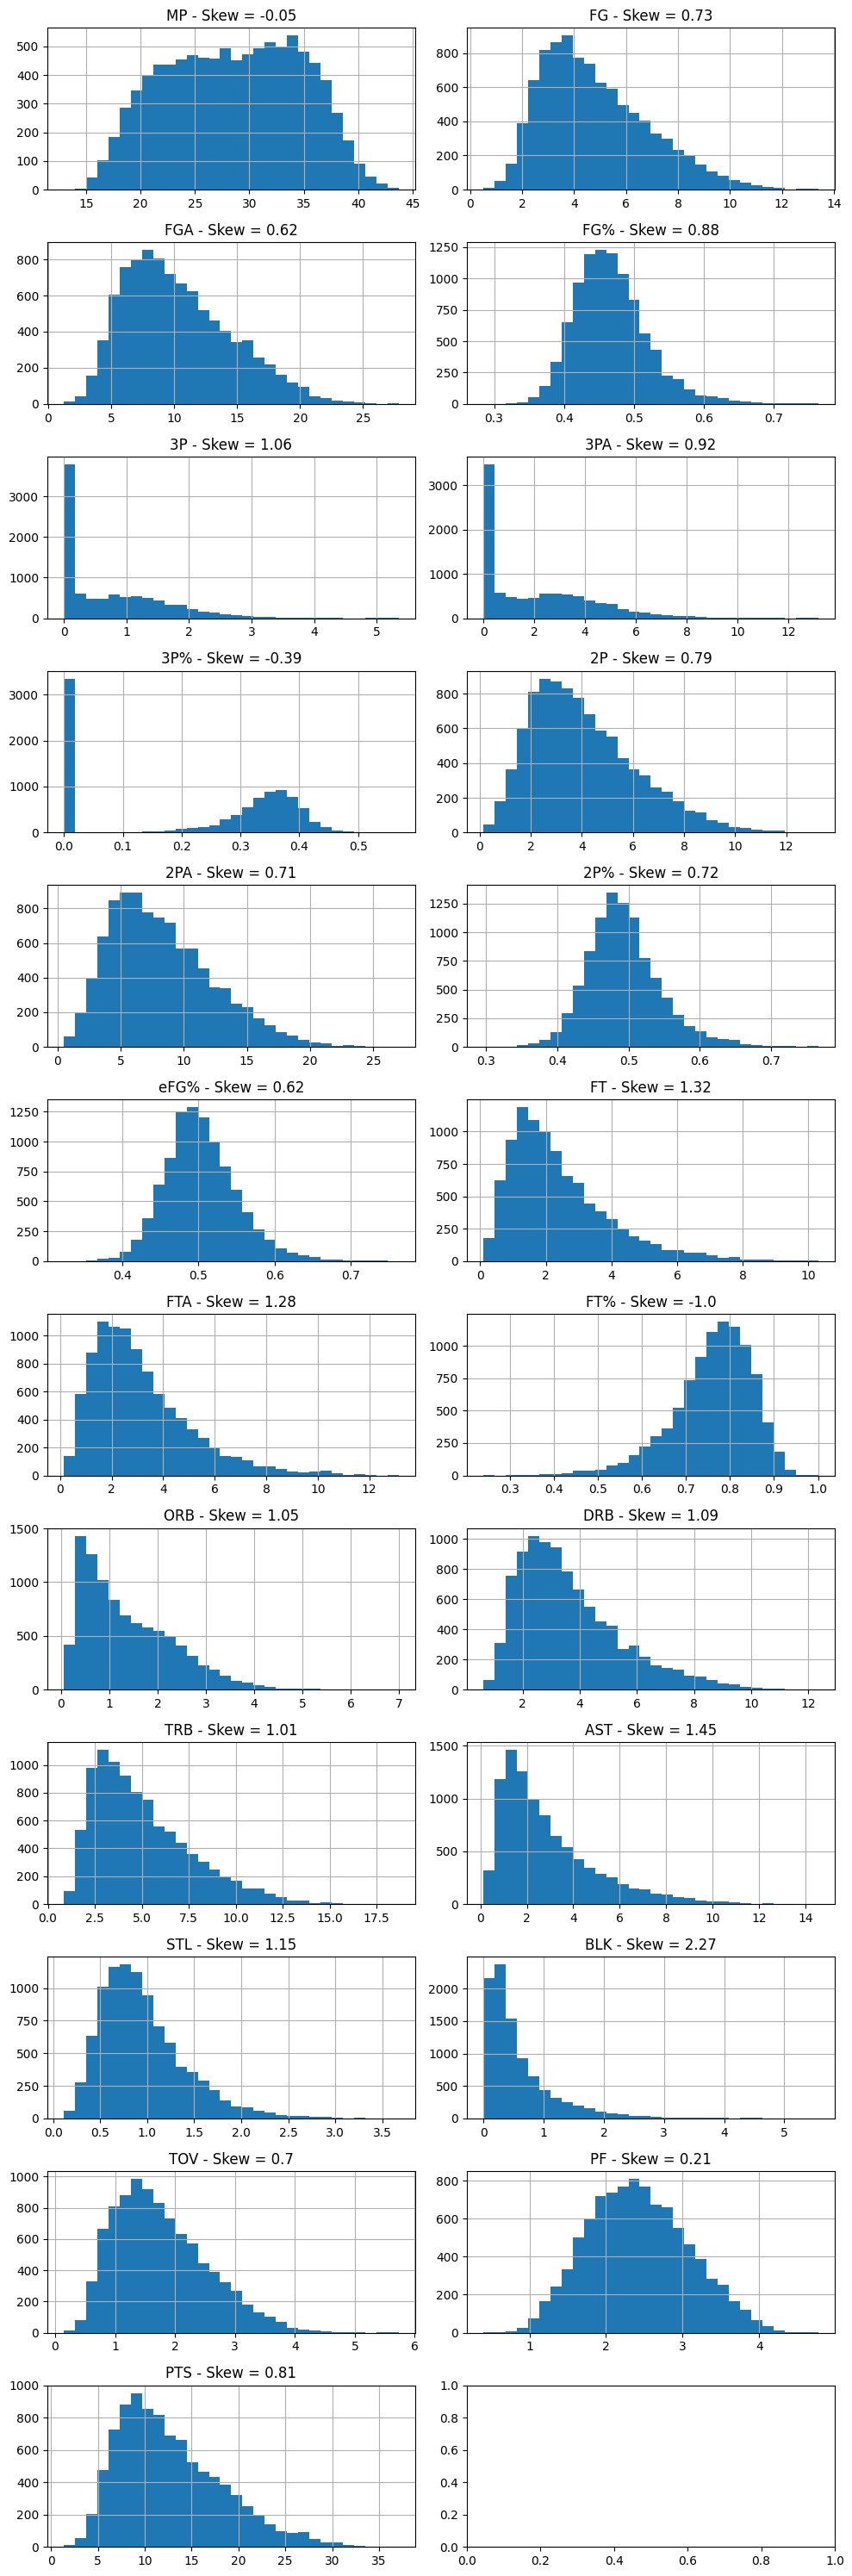

In [25]:
# Configuração das subplots

fig, axs = plt.subplots(nrows=math.ceil(len(columns_hist)/2), ncols=2, figsize=(10, 30))

# Loop para criar os gráficos
for n, col in enumerate(columns_hist):
    # Converter o índice 'n' em índices de linha e coluna
    row = n // 2
    col_idx = n % 2
    df[col].hist(ax=axs[row, col_idx], bins=30, )  # Corrigir a referência ao 'ax' correto
    skew = round(df[col].skew(), 2)
    axs[row, col_idx].set_title(f'{col} - Skew = {skew}')  # Adiciona o nome da coluna como título de cada gráfico

plt.tight_layout()
plt.show()


### Boxplots

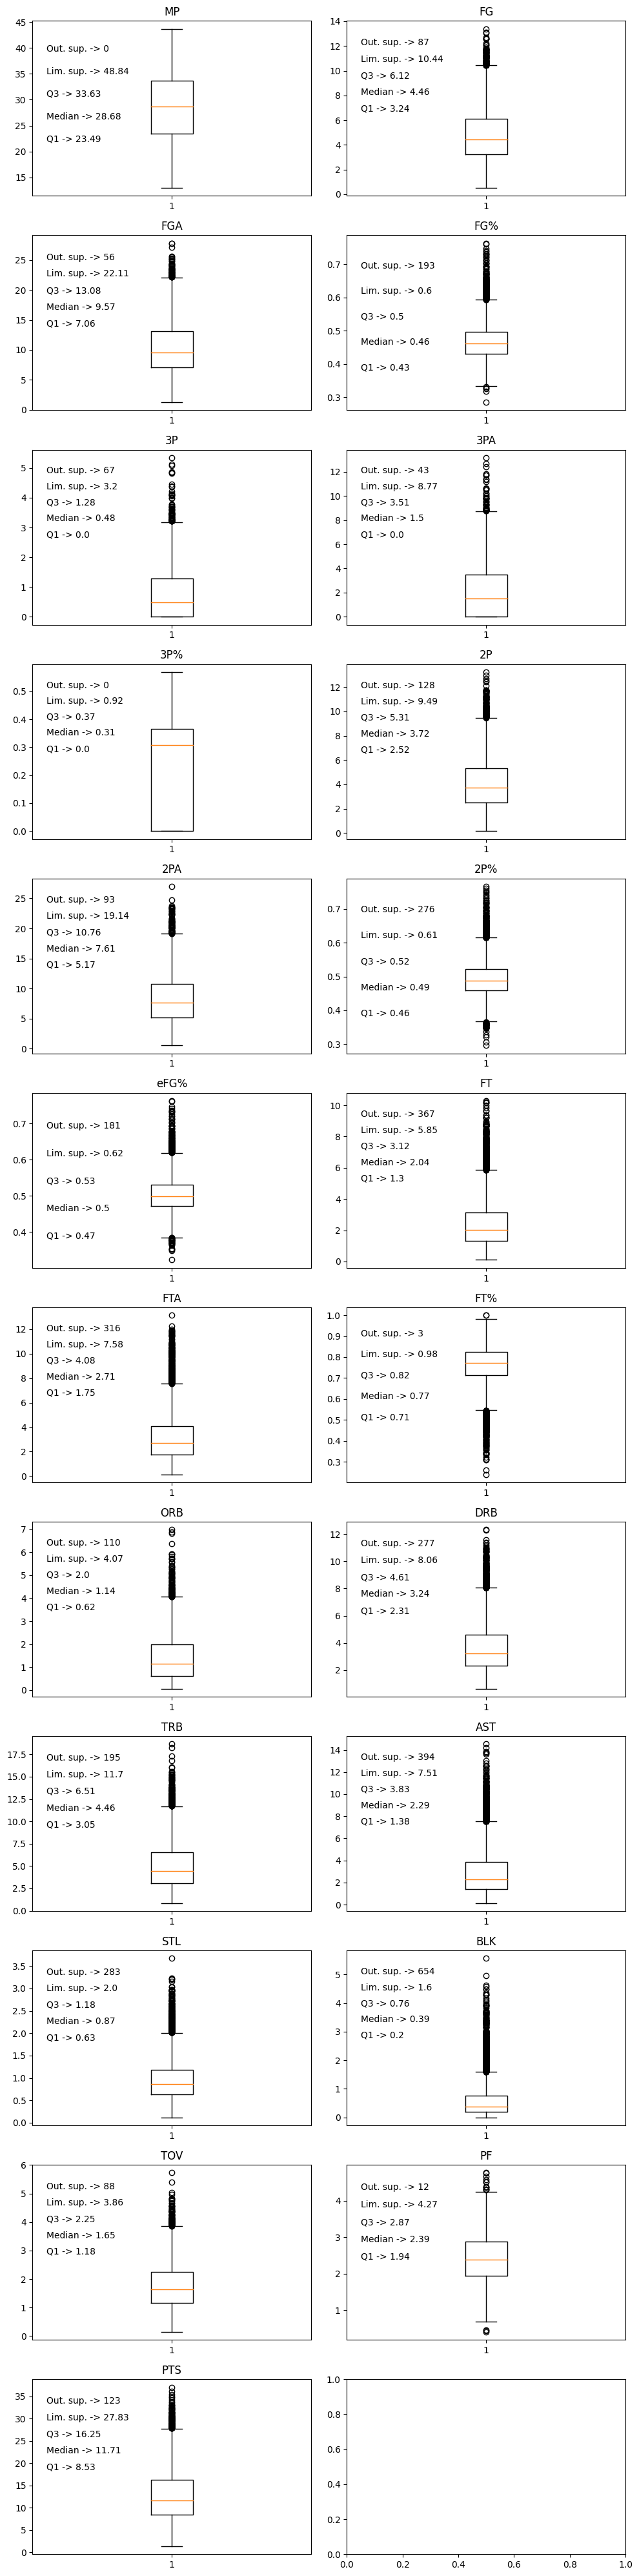

In [26]:
# Configuração das subplots

fig, axs = plt.subplots(nrows=math.ceil(len(columns_hist)/2), ncols=2, figsize=(10, 40))

# Loop para criar os gráficos
for n, col in enumerate(columns_hist):
    
    
    # Converter o índice 'n' em índices de linha e coluna
    row = n // 2
    col_idx = n % 2
    axs[row, col_idx].boxplot(df[col])  # Corrigir a referência ao 'ax' correto
    axs[row, col_idx].set_title(f'{col}')  # Adiciona o nome da coluna como título de cada gráfico

    #Calculando dados do boxplot
    q1 = round(df[col].quantile(0.25),2)
    median = round(df[col].quantile(0.50),2)
    q3 = round(df[col].quantile(0.75),2)
    iqr = q3 - q1
    limite_superior = round(q3 + 1.5*iqr,2)
    outliers_superior = df[df[col] > limite_superior]['PTS'].count()
    
    # Adicionando texto no gráfico
    col_max = df[col].max()
    axs[row, col_idx].text(0.55,((col_max)-0.1*col_max),f"Out. sup. -> {outliers_superior}")        
    axs[row, col_idx].text(0.55,((col_max)-0.2*col_max),f"Lim. sup. -> {limite_superior}")    
    axs[row, col_idx].text(0.55,((col_max)-0.3*col_max),f"Q3 -> {q3}")
    axs[row, col_idx].text(0.55,((col_max)-0.4*col_max),f"Median -> {median}")
    axs[row, col_idx].text(0.55,((col_max)-0.5*col_max),f"Q1 -> {q1}")
    
plt.tight_layout()
plt.show()

### Conclusão

1) Em Geral as variáveis tem distribuição normal (Exceção de BLK)

2) Todas as variáveis possuem Outliers, que são importante para a caracterização do perfil dos jogadores

3) Para manter a importância dos outilers o melhor método de escalonamento é o Standart Scaler

## Tratamentos finais para a clusterização

### Criação de uma chave indentificadora e transformação em index

In [27]:
df['key'] = df['Season'].astype(str) + " - " + df['Player']

In [28]:
df.set_index('key', inplace=True)

### Criando uma Df numérica

In [29]:
numeric_df = df.iloc[:,5:].copy()

In [30]:
numeric_df

MP   FG   FGA  FG%   3P  3PA  3P%   2P   2PA  \
key                                                                           
1980 - Brian Taylor         35.31 5.36 11.47 0.47 1.15 3.06 0.38 4.21  8.41   
1980 - Rick Barry           25.22 4.51 10.71 0.42 1.01 3.07 0.33 3.50  7.64   
1980 - Chris Ford           28.97 4.52  9.71 0.47 0.96 2.25 0.43 3.56  7.47   
1980 - Mike Newlin          32.18 7.83 17.04 0.46 0.58 1.95 0.30 7.26 15.09   
1980 - Larry Bird           36.04 8.45 17.84 0.47 0.71 1.74 0.41 7.74 16.10   
...                           ...  ...   ...  ...  ...  ...  ...  ...   ...   
2024 - Kevon Looney         16.15 1.88  3.15 0.60 0.00 0.00 0.00 1.88  3.14   
2024 - Trayce Jackson-Davis 16.62 3.43  4.88 0.70 0.00 0.00 0.00 3.43  4.87   
2024 - Daniel Gafford       24.53 4.70  6.49 0.72 0.00 0.00 0.00 4.70  6.49   
2024 - Ivica Zubac          26.38 4.96  7.63 0.65 0.00 0.00 0.00 4.96  7.63   
2024 - Jakob Poeltl         26.38 4.96  7.56 0.66 0.00 0.00 0.00 4.96  7.56   

                             2P%  eFG%   FT  FTA  FT%  ORB  DRB   TRB  AST  \
key                                                                          
1980 - Brian Taylor         0.50  0.52 1.67 2.08 0.80 0.97 1.44  2.41 4.29   
1980 - Rick Barry           0.46  0.47 1.99 2.12 0.93 0.74 2.54  3.28 3.72   
1980 - Chris Ford           0.48  0.51 1.18 1.56 0.75 1.05 1.42  2.48 2.95   
1980 - Mike Newlin          0.48  0.48 4.71 5.32 0.88 1.29 2.09  3.38 4.03   
1980 - Larry Bird           0.48  0.49 3.67 4.39 0.84 2.63 7.76 10.39 4.51   
...                          ...   ...  ...  ...  ...  ...  ...   ...  ...   
2024 - Kevon Looney         0.60  0.60 0.76 1.12 0.67 1.93 3.73  5.66 1.80   
2024 - Trayce Jackson-Davis 0.70  0.70 1.09 1.94 0.56 1.99 3.03  5.01 1.21   
2024 - Daniel Gafford       0.72  0.72 1.59 2.36 0.67 2.64 4.96  7.59 1.55   
2024 - Ivica Zubac          0.65  0.65 1.76 2.44 0.72 2.88 6.32  9.21 1.37   
2024 - Jakob Poeltl         0.66  0.66 1.18 2.14 0.55 2.92 5.66  8.58 2.54   

                             STL  BLK  TOV   PF   PTS  
key                                                    
1980 - Brian Taylor         1.88 0.32 1.81 3.15 13.54  
1980 - Rick Barry           1.11 0.39 2.11 2.53 12.03  
1980 - Chris Ford           1.52 0.37 1.44 2.44 11.18  
1980 - Mike Newlin          1.47 0.05 2.96 2.50 20.95  
1980 - Larry Bird           1.74 0.65 3.21 3.40 21.28  
...                          ...  ...  ...  ...   ...  
2024 - Kevon Looney         0.38 0.39 0.68 2.09  4.51  
2024 - Trayce Jackson-Davis 0.43 1.12 0.72 1.59  7.94  
2024 - Daniel Gafford       0.88 2.07 1.00 3.07 11.00  
2024 - Ivica Zubac          0.32 1.22 1.16 2.65 11.68  
2024 - Jakob Poeltl         0.70 1.52 1.54 2.98 11.10  

[9446 rows x 23 columns]

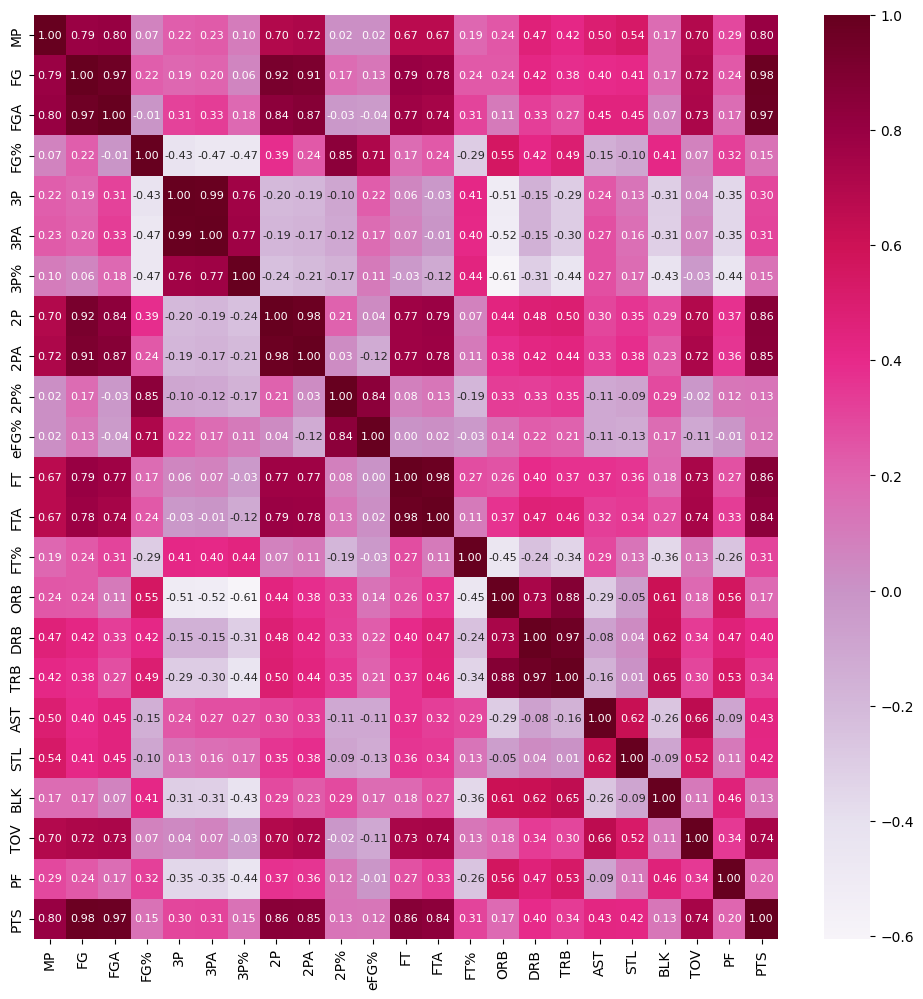

In [31]:
plt.figure(figsize=(12,12))

sns.heatmap(numeric_df.corr(),
            annot = True,
            annot_kws = {"fontsize":8},
            cmap='PuRd',
            fmt=".2f");

### Removendo variáveis reduntandes

In [32]:
numeric_df.drop(columns=['FG', '3P', '2P', '2PA','2P%','FT','ORB','DRB','PF','TOV'], inplace=True)
numeric_df

MP   FGA  FG%  3PA  3P%  eFG%  FTA  FT%   TRB  \
key                                                                            
1980 - Brian Taylor         35.31 11.47 0.47 3.06 0.38  0.52 2.08 0.80  2.41   
1980 - Rick Barry           25.22 10.71 0.42 3.07 0.33  0.47 2.12 0.93  3.28   
1980 - Chris Ford           28.97  9.71 0.47 2.25 0.43  0.51 1.56 0.75  2.48   
1980 - Mike Newlin          32.18 17.04 0.46 1.95 0.30  0.48 5.32 0.88  3.38   
1980 - Larry Bird           36.04 17.84 0.47 1.74 0.41  0.49 4.39 0.84 10.39   
...                           ...   ...  ...  ...  ...   ...  ...  ...   ...   
2024 - Kevon Looney         16.15  3.15 0.60 0.00 0.00  0.60 1.12 0.67  5.66   
2024 - Trayce Jackson-Davis 16.62  4.88 0.70 0.00 0.00  0.70 1.94 0.56  5.01   
2024 - Daniel Gafford       24.53  6.49 0.72 0.00 0.00  0.72 2.36 0.67  7.59   
2024 - Ivica Zubac          26.38  7.63 0.65 0.00 0.00  0.65 2.44 0.72  9.21   
2024 - Jakob Poeltl         26.38  7.56 0.66 0.00 0.00  0.66 2.14 0.55  8.58   

                             AST  STL  BLK   PTS  
key                                               
1980 - Brian Taylor         4.29 1.88 0.32 13.54  
1980 - Rick Barry           3.72 1.11 0.39 12.03  
1980 - Chris Ford           2.95 1.52 0.37 11.18  
1980 - Mike Newlin          4.03 1.47 0.05 20.95  
1980 - Larry Bird           4.51 1.74 0.65 21.28  
...                          ...  ...  ...   ...  
2024 - Kevon Looney         1.80 0.38 0.39  4.51  
2024 - Trayce Jackson-Davis 1.21 0.43 1.12  7.94  
2024 - Daniel Gafford       1.55 0.88 2.07 11.00  
2024 - Ivica Zubac          1.37 0.32 1.22 11.68  
2024 - Jakob Poeltl         2.54 0.70 1.52 11.10  

[9446 rows x 13 columns]

### Escalonando as variáveis

In [33]:
scaler = MinMaxScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_df),
                              columns=numeric_df.columns, 
                              index = numeric_df.index)
numeric_scaled

MP  FGA  FG%  3PA  3P%  eFG%  FTA  FT%  TRB  \
key                                                                         
1980 - Brian Taylor         0.73 0.38 0.38 0.23 0.66  0.44 0.15 0.74 0.09   
1980 - Rick Barry           0.40 0.36 0.29 0.23 0.58  0.33 0.15 0.91 0.14   
1980 - Chris Ford           0.52 0.32 0.38 0.17 0.75  0.44 0.11 0.68 0.09   
1980 - Mike Newlin          0.63 0.59 0.37 0.15 0.52  0.35 0.40 0.85 0.14   
1980 - Larry Bird           0.75 0.62 0.39 0.13 0.71  0.39 0.33 0.78 0.54   
...                          ...  ...  ...  ...  ...   ...  ...  ...  ...   
2024 - Kevon Looney         0.10 0.07 0.65 0.00 0.00  0.62 0.07 0.57 0.27   
2024 - Trayce Jackson-Davis 0.12 0.14 0.87 0.00 0.00  0.86 0.14 0.42 0.23   
2024 - Daniel Gafford       0.38 0.20 0.92 0.00 0.00  0.91 0.17 0.57 0.38   
2024 - Ivica Zubac          0.44 0.24 0.76 0.00 0.00  0.74 0.18 0.64 0.47   
2024 - Jakob Poeltl         0.44 0.24 0.78 0.00 0.00  0.76 0.15 0.41 0.43   

                             AST  STL  BLK  PTS  
key                                              
1980 - Brian Taylor         0.29 0.50 0.06 0.34  
1980 - Rick Barry           0.25 0.28 0.07 0.30  
1980 - Chris Ford           0.20 0.40 0.07 0.27  
1980 - Mike Newlin          0.27 0.38 0.01 0.55  
1980 - Larry Bird           0.30 0.46 0.12 0.56  
...                          ...  ...  ...  ...  
2024 - Kevon Looney         0.12 0.07 0.07 0.09  
2024 - Trayce Jackson-Davis 0.07 0.09 0.20 0.18  
2024 - Daniel Gafford       0.10 0.21 0.37 0.27  
2024 - Ivica Zubac          0.09 0.06 0.22 0.29  
2024 - Jakob Poeltl         0.17 0.16 0.27 0.27  

[9446 rows x 13 columns]

# Entendendo o PCA da base

Aplicando PCA para entender quantas variáveis usae

In [34]:
pca = PCA()
pca.fit(numeric_scaled)

PCA()

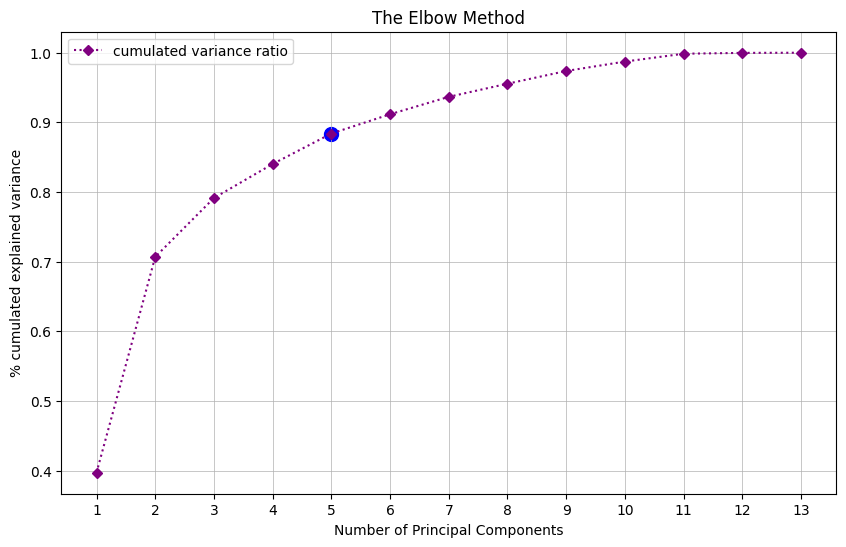

In [35]:
pca_groups = 5
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,explained_variance_ratio_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,explained_variance_ratio_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=5)
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)
    ax.scatter(pca_groups,explained_variance_ratio_cumulated[pca_groups-1],c='blue',s=100)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

# Realizando o clustering com PCA = 3

### Limitando o PCA para 3 variáveis

In [36]:
threhsold_pca = 3
pca3 = PCA(n_components=threhsold_pca, whiten=True)
pca3.fit(numeric_scaled)
pca3_nba_proj = pd.DataFrame(pca3.transform(numeric_scaled),index = numeric_scaled.index)
pca3_nba_proj

0     1     2
key                                          
1980 - Brian Taylor          1.05 -0.05  0.69
1980 - Rick Barry            0.59 -0.65  0.72
1980 - Chris Ford            0.78 -0.73  0.10
1980 - Mike Newlin           0.95  0.71  0.89
1980 - Larry Bird            1.27  1.13 -0.46
...                           ...   ...   ...
2024 - Kevon Looney         -1.86 -0.79 -0.83
2024 - Trayce Jackson-Davis -1.91 -0.37 -2.25
2024 - Daniel Gafford       -1.59  0.52 -2.68
2024 - Ivica Zubac          -1.47  0.54 -2.19
2024 - Jakob Poeltl         -1.52  0.59 -1.99

[9446 rows x 3 columns]

## Aplicando o K means para descobrir o número de grupos com PCA = 4

In [37]:
nb_clusters_to_try = np.arange(1,20+1,1)
nb_clusters_to_try

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [38]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(pca3_nba_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
DONE !


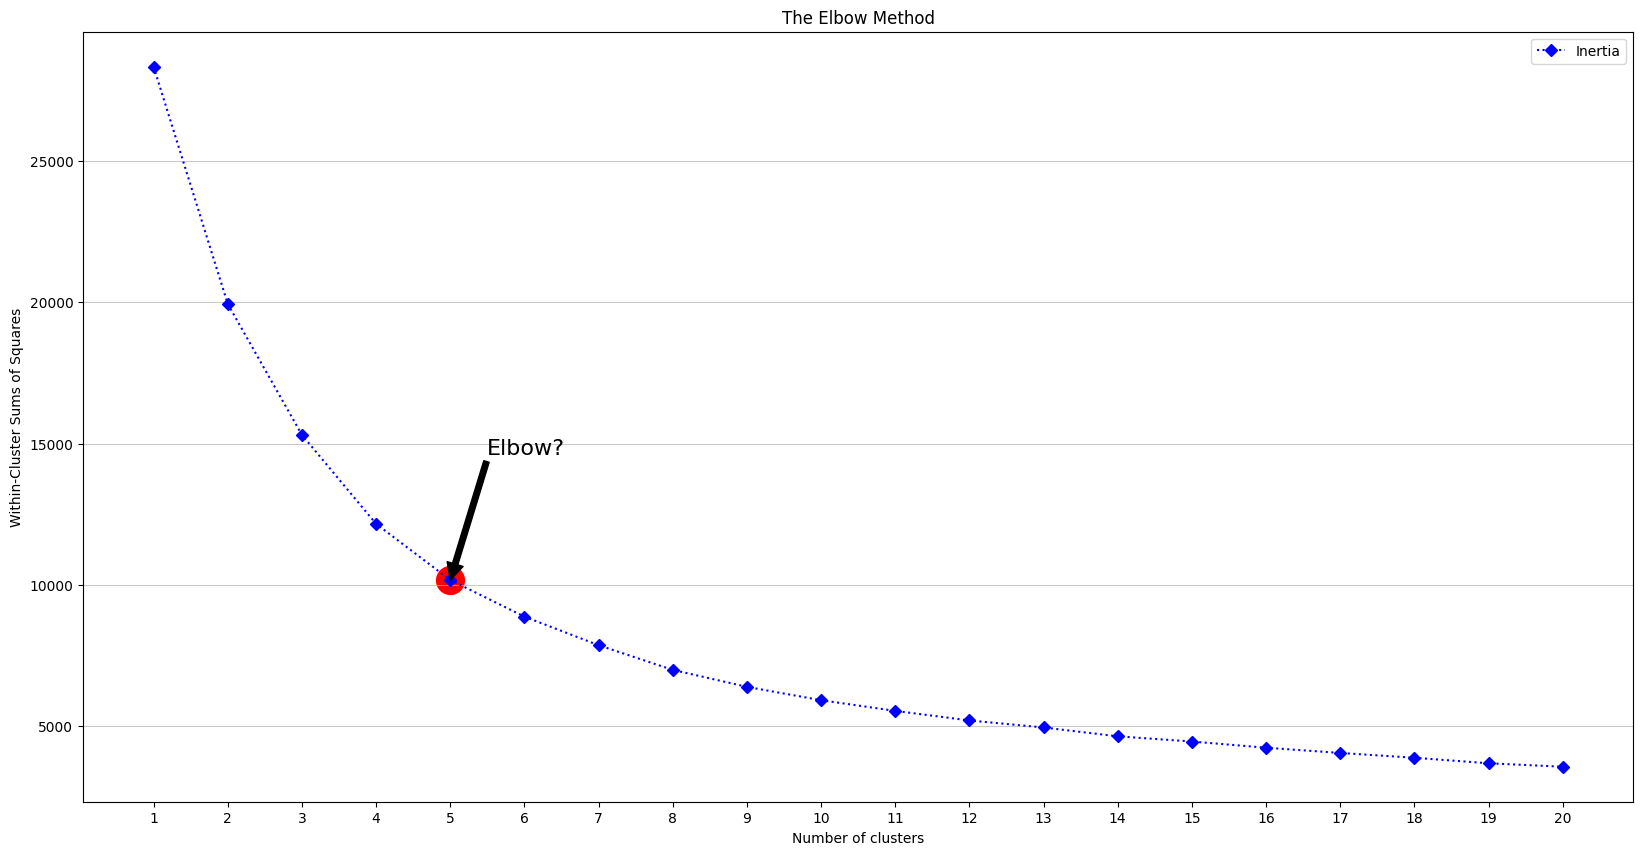

In [39]:
elbow_highlight = 5
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

# Realizando o clustering com PCA = 4

Limitando o PCA para 4 variáveis

In [40]:
threhsold_pca = 4
pca4 = PCA(n_components=threhsold_pca, whiten=True)
pca4.fit(numeric_scaled)
pca4_nba_proj = pd.DataFrame(pca4.transform(numeric_scaled),index = numeric_scaled.index)
pca4_nba_proj

0     1     2     3
key                                                
1980 - Brian Taylor          1.05 -0.05  0.69  1.54
1980 - Rick Barry            0.59 -0.65  0.72 -0.63
1980 - Chris Ford            0.78 -0.73  0.10  1.21
1980 - Mike Newlin           0.95  0.71  0.89 -0.80
1980 - Larry Bird            1.27  1.13 -0.46  0.55
...                           ...   ...   ...   ...
2024 - Kevon Looney         -1.86 -0.79 -0.83  1.40
2024 - Trayce Jackson-Davis -1.91 -0.37 -2.25  2.64
2024 - Daniel Gafford       -1.59  0.52 -2.68  3.22
2024 - Ivica Zubac          -1.47  0.54 -2.19  1.46
2024 - Jakob Poeltl         -1.52  0.59 -1.99  2.76

[9446 rows x 4 columns]

## Aplicando o K means para descobrir o número de grupos com PCA = 5

In [41]:
nb_clusters_to_try = np.arange(1,20+1,1)
nb_clusters_to_try

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [42]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(pca4_nba_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
DONE !


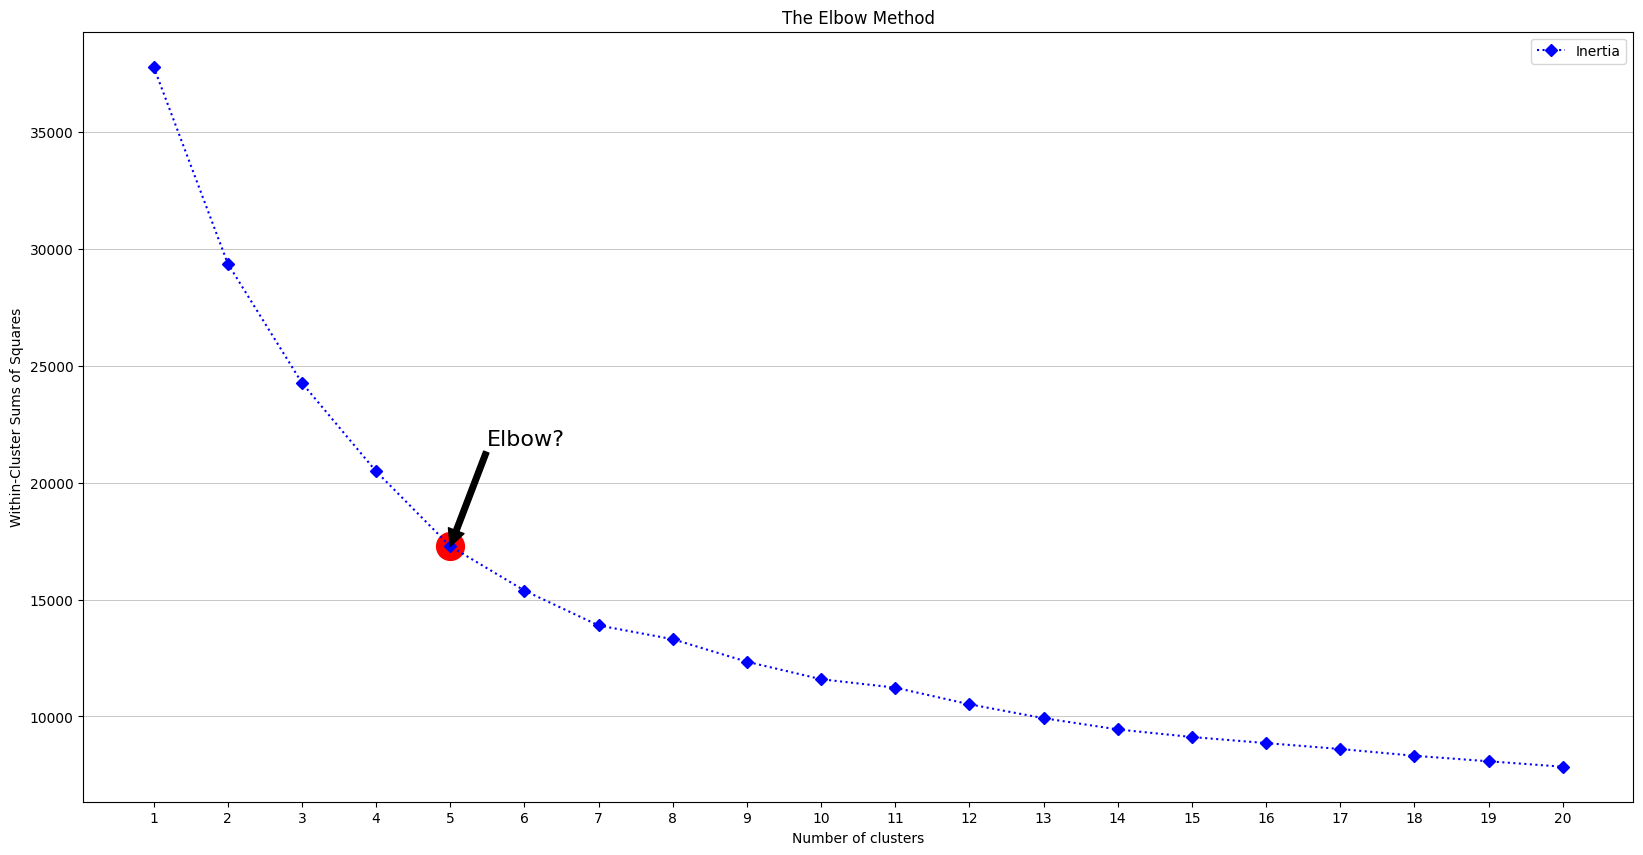

In [43]:
elbow_highlight = 5
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

# Realizando o clustering com PCA = 5

In [44]:
threhsold_pca = 5
pca5 = PCA(n_components=threhsold_pca, whiten=True)
pca5.fit(numeric_scaled)
pca5_nba_proj = pd.DataFrame(pca5.transform(numeric_scaled),index = numeric_scaled.index)
pca5_nba_proj

0     1     2     3     4
key                                                      
1980 - Brian Taylor          1.05 -0.05  0.69  1.54 -0.29
1980 - Rick Barry            0.59 -0.65  0.72 -0.63  0.51
1980 - Chris Ford            0.78 -0.73  0.10  1.21 -0.38
1980 - Mike Newlin           0.95  0.71  0.89 -0.80  1.16
1980 - Larry Bird            1.27  1.13 -0.46  0.55 -0.92
...                           ...   ...   ...   ...   ...
2024 - Kevon Looney         -1.86 -0.79 -0.83  1.40  1.98
2024 - Trayce Jackson-Davis -1.91 -0.37 -2.25  2.64  3.04
2024 - Daniel Gafford       -1.59  0.52 -2.68  3.22  2.62
2024 - Ivica Zubac          -1.47  0.54 -2.19  1.46  1.88
2024 - Jakob Poeltl         -1.52  0.59 -1.99  2.76  1.05

[9446 rows x 5 columns]

## Aplicando o K means para descobrir o número de grupos com PCA = 5

In [45]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(pca5_nba_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
DONE !


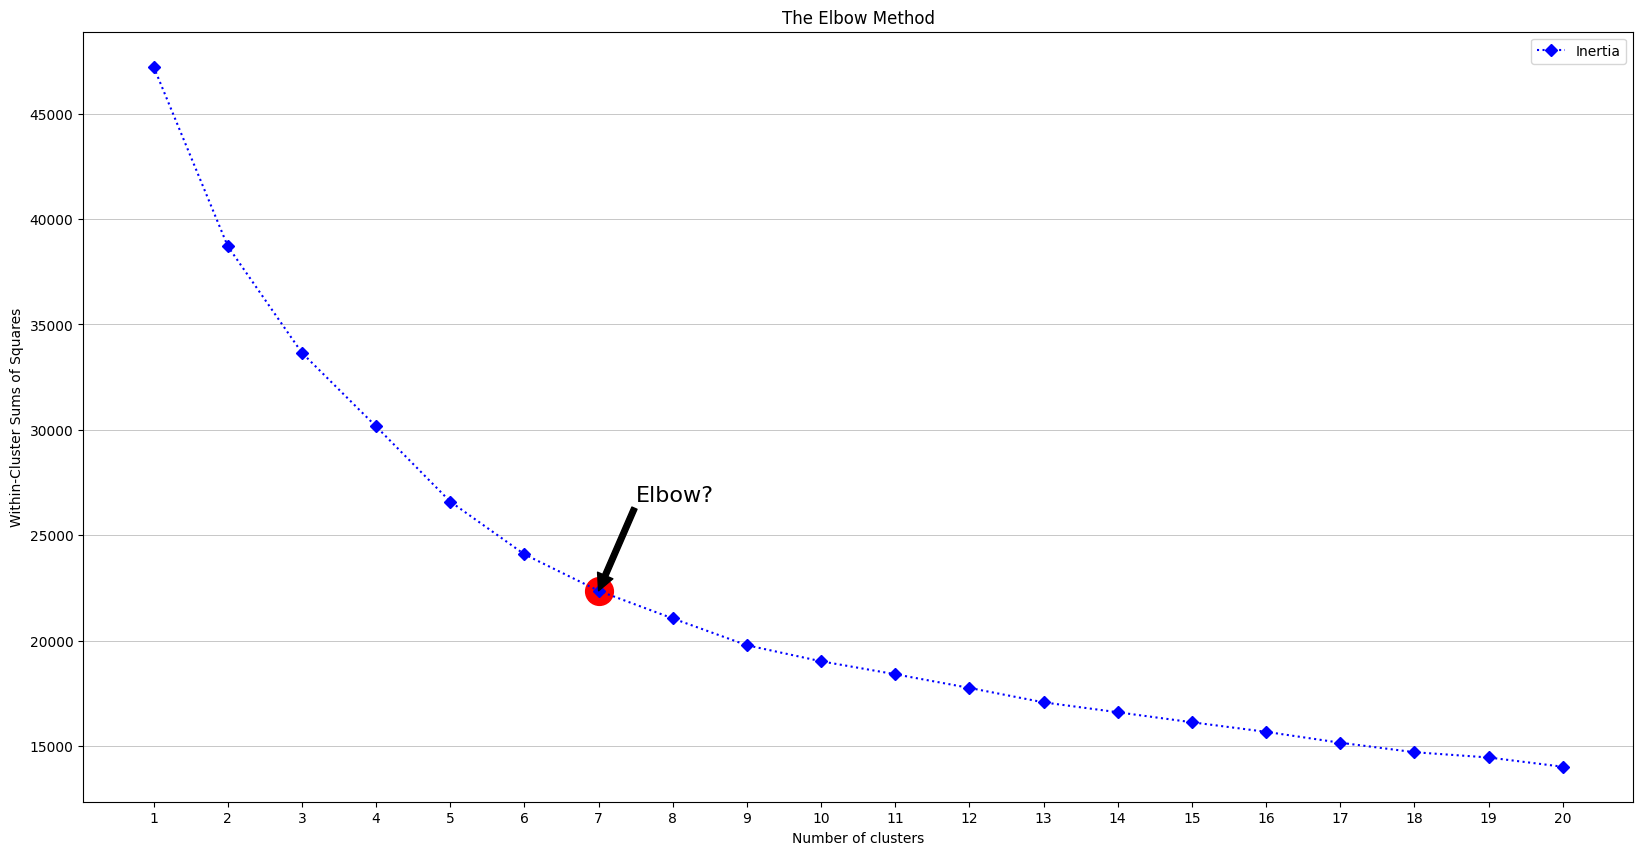

In [46]:
elbow_highlight = 7
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

# Criando Pipelines para testar agrupamentos

## PCA = 3 & Grupos = 4

In [47]:
# from sklearn.pipeline import make_pipeline

# pipeline_pca3_cluster4 = make_pipeline(
#     PCA(n_components=3),
#     KMeans(n_clusters=4)
# )

# pipeline_pca3_cluster4.fit(numeric_scaled)
# numeric_scaled

In [48]:
# labels_1 = pd.DataFrame(pipeline_pca3_cluster4.predict(numeric_scaled), index=numeric_scaled.index)
# df = pd.concat([df,labels_1],axis=1).rename(columns={0:"labels_1"})
# df.labels_1.value_counts(normalize=True)

In [49]:
# numeric_scaled = pd.concat([numeric_scaled,labels_1],axis=1).rename(columns={0:"labels_1"})
# numeric_scaled.labels_1.value_counts(normalize=True)

## PCA = 4 & Grupos = 5

In [50]:
# from sklearn.pipeline import make_pipeline
    
# pipeline_pca4_cluster5 = make_pipeline(
#     PCA(n_components=4, random_state=0),
#     KMeans(n_clusters=5)
# )

# pipeline_pca4_cluster5.fit(numeric_scaled)
# numeric_scaled

In [51]:
# labels_2 = pd.DataFrame(pipeline_pca4_cluster5.predict(numeric_scaled), index=numeric_scaled.index)
# df = pd.concat([df,labels_2],axis=1).rename(columns={0:"labels_2"})
# df.labels_2.value_counts(normalize=True)

In [52]:
# numeric_scaled = pd.concat([numeric_scaled,labels_2],axis=1).rename(columns={0:"labels_2"})
# numeric_scaled.labels_2.value_counts(normalize=True)

## PCA = 5 & Grupos = 7

In [53]:
from sklearn.pipeline import make_pipeline
    
pipeline_pca5_cluster7 = make_pipeline(
    PCA(n_components=5, random_state=0),
    KMeans(n_clusters=7, random_state=100, max_iter=5000)
)

pipeline_pca5_cluster7.fit(numeric_scaled)
numeric_scaled

MP  FGA  FG%  3PA  3P%  eFG%  FTA  FT%  TRB  \
key                                                                         
1980 - Brian Taylor         0.73 0.38 0.38 0.23 0.66  0.44 0.15 0.74 0.09   
1980 - Rick Barry           0.40 0.36 0.29 0.23 0.58  0.33 0.15 0.91 0.14   
1980 - Chris Ford           0.52 0.32 0.38 0.17 0.75  0.44 0.11 0.68 0.09   
1980 - Mike Newlin          0.63 0.59 0.37 0.15 0.52  0.35 0.40 0.85 0.14   
1980 - Larry Bird           0.75 0.62 0.39 0.13 0.71  0.39 0.33 0.78 0.54   
...                          ...  ...  ...  ...  ...   ...  ...  ...  ...   
2024 - Kevon Looney         0.10 0.07 0.65 0.00 0.00  0.62 0.07 0.57 0.27   
2024 - Trayce Jackson-Davis 0.12 0.14 0.87 0.00 0.00  0.86 0.14 0.42 0.23   
2024 - Daniel Gafford       0.38 0.20 0.92 0.00 0.00  0.91 0.17 0.57 0.38   
2024 - Ivica Zubac          0.44 0.24 0.76 0.00 0.00  0.74 0.18 0.64 0.47   
2024 - Jakob Poeltl         0.44 0.24 0.78 0.00 0.00  0.76 0.15 0.41 0.43   

                             AST  STL  BLK  PTS  
key                                              
1980 - Brian Taylor         0.29 0.50 0.06 0.34  
1980 - Rick Barry           0.25 0.28 0.07 0.30  
1980 - Chris Ford           0.20 0.40 0.07 0.27  
1980 - Mike Newlin          0.27 0.38 0.01 0.55  
1980 - Larry Bird           0.30 0.46 0.12 0.56  
...                          ...  ...  ...  ...  
2024 - Kevon Looney         0.12 0.07 0.07 0.09  
2024 - Trayce Jackson-Davis 0.07 0.09 0.20 0.18  
2024 - Daniel Gafford       0.10 0.21 0.37 0.27  
2024 - Ivica Zubac          0.09 0.06 0.22 0.29  
2024 - Jakob Poeltl         0.17 0.16 0.27 0.27  

[9446 rows x 13 columns]

In [54]:
labels_3 = pd.DataFrame(pipeline_pca5_cluster7.predict(numeric_scaled), index=numeric_scaled.index)
df = pd.concat([df,labels_3],axis=1).rename(columns={0:"labels_3"})
df.labels_3.value_counts()

2    2203
6    1971
1    1474
5    1186
4    1076
3     833
0     703
Name: labels_3, dtype: int64

In [55]:
numeric_scaled = pd.concat([numeric_scaled,labels_3],axis=1).rename(columns={0:"labels_3"})
numeric_scaled.labels_3.value_counts(normalize=True)

2   0.23
6   0.21
1   0.16
5   0.13
4   0.11
3   0.09
0   0.07
Name: labels_3, dtype: float64

# Visualização dos grupos

In [56]:
# df.groupby('labels_1').mean()

In [57]:
# df.groupby('labels_2').mean()

In [58]:
 df.groupby('labels_3').mean()

Season   Age     G    GS    MP   FG   FGA  FG%   3P  3PA  3P%   2P  \
labels_3                                                                        
0        1,997.42 28.32 73.46 65.81 33.66 5.48 12.09 0.45 0.60 1.85 0.26 4.88   
1        1,997.03 29.74 74.19 29.66 22.26 3.11  6.47 0.48 0.00 0.02 0.00 3.09   
2        2,009.53 30.41 71.12 23.49 22.56 3.07  7.04 0.44 0.90 2.51 0.35 2.17   
3        1,994.06 27.62 73.90 65.82 34.91 7.43 14.66 0.51 0.01 0.04 0.01 7.40   
4        2,000.14 28.73 73.42 56.40 29.07 4.51  8.71 0.52 0.00 0.02 0.00 4.50   
5        2,007.50 27.89 71.07 69.17 36.32 7.96 17.18 0.46 1.55 4.28 0.35 6.40   
6        2,009.23 29.47 70.66 52.33 30.40 5.00 11.16 0.45 1.36 3.66 0.36 3.65   

           2PA  2P%  eFG%   FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
labels_3                                                                      
0        10.22 0.48  0.48 2.87 3.66 0.78 0.95 2.94 3.89 6.98 1.70 0.30 2.64   
1         6.36 0.49  0.49 1.55 2.16 0.71 1.56 3.02 4.58 1.67 0.69 0.62 1.32   
2         4.53 0.48  0.50 1.22 1.58 0.77 0.71 2.36 3.07 2.14 0.75 0.29 1.14   
3        14.50 0.51  0.51 4.18 5.64 0.75 2.65 5.89 8.53 2.74 1.03 1.17 2.52   
4         8.63 0.53  0.53 2.23 3.27 0.68 2.66 5.40 8.06 1.56 0.77 1.21 1.70   
5        12.90 0.50  0.51 4.66 5.73 0.81 1.31 4.56 5.87 4.65 1.29 0.55 2.68   
6         7.49 0.49  0.51 2.20 2.76 0.79 1.01 3.42 4.43 2.93 0.97 0.44 1.68   

           PF   PTS  
labels_3             
0        2.46 14.44  
1        2.53  7.80  
2        1.94  8.25  
3        3.02 19.08  
4        3.00 11.27  
5        2.43 22.12  
6        2.30 13.56

In [91]:
df[df['Player'] == 'Nikola Jokić']

Season        Player  Age   G    GS    MP    FG   FGA  \
key                                                                          
2016 - Nikola Jokić    2016  Nikola Jokić   20  80 55.00 21.66  3.84  7.50   
2017 - Nikola Jokić    2017  Nikola Jokić   21  73 59.00 27.92  6.77 11.70   
2018 - Nikola Jokić    2018  Nikola Jokić   22  75 73.00 32.57  6.72 13.47   
2019 - Nikola Jokić    2019  Nikola Jokić   23  80 80.00 31.30  7.70 15.07   
2020 - Nikola Jokić    2020  Nikola Jokić   24  73 73.00 32.00  7.74 14.67   
2021 - Nikola Jokić    2021  Nikola Jokić   25  72 72.00 34.56 10.17 17.96   
2022 - Nikola Jokić    2022  Nikola Jokić   26  74 74.00 33.46 10.32 17.72   
2023 - Nikola Jokić    2023  Nikola Jokić   27  69 69.00 33.67  9.36 14.81   
2024 - Nikola Jokić    2024  Nikola Jokić   28  79 79.00 34.65 10.41 17.86   

                     FG%   3P  3PA  3P%   2P   2PA  2P%  eFG%   FT  FTA  FT%  \
key                                                                            
2016 - Nikola Jokić 0.51 0.35 1.05 0.33 3.49  6.45 0.54  0.54 1.93 2.38 0.81   
2017 - Nikola Jokić 0.58 0.62 1.90 0.32 6.15  9.79 0.63  0.60 2.58 3.12 0.82   
2018 - Nikola Jokić 0.50 1.48 3.73 0.40 5.24  9.73 0.54  0.55 3.55 4.17 0.85   
2019 - Nikola Jokić 0.51 1.04 3.38 0.31 6.66 11.70 0.57  0.55 3.61 4.40 0.82   
2020 - Nikola Jokić 0.53 1.10 3.49 0.31 6.64 11.18 0.59  0.56 3.37 4.12 0.82   
2021 - Nikola Jokić 0.57 1.28 3.29 0.39 8.89 14.67 0.61  0.60 4.75 5.47 0.87   
2022 - Nikola Jokić 0.58 1.31 3.89 0.34 9.01 13.82 0.65  0.62 5.12 6.32 0.81   
2023 - Nikola Jokić 0.63 0.83 2.16 0.38 8.54 12.65 0.67  0.66 4.94 6.01 0.82   
2024 - Nikola Jokić 0.58 1.05 2.92 0.36 9.35 14.94 0.63  0.61 4.53 5.54 0.82   

                     ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  labels_3  
key                                                                            
2016 - Nikola Jokić 2.26  4.74  7.00 2.36 0.99 0.62 1.30 2.60  9.95         2  
2017 - Nikola Jokić 2.90  6.93  9.84 4.92 0.84 0.75 2.34 2.93 16.73         6  
2018 - Nikola Jokić 2.60  8.11 10.71 6.11 1.20 0.81 2.80 2.83 18.47         5  
2019 - Nikola Jokić 2.85  7.96 10.81 7.25 1.35 0.69 3.10 2.85 20.05         5  
2020 - Nikola Jokić 2.27  7.47  9.74 7.01 1.16 0.60 3.10 3.04 19.95         5  
2021 - Nikola Jokić 2.85  7.99 10.83 8.32 1.32 0.67 3.08 2.67 26.36         5  
2022 - Nikola Jokić 2.78 10.99 13.77 7.89 1.47 0.85 3.80 2.58 27.08         5  
2023 - Nikola Jokić 2.42  9.42 11.84 9.83 1.26 0.68 3.58 2.52 24.49         5  
2024 - Nikola Jokić 2.82  9.53 12.35 8.96 1.37 0.86 3.00 2.46 26.39         5

In [94]:
!git add .

In [95]:
!git commit -m"24/10/08"

[main fb36728] 24/10/08
 9 files changed, 33809 insertions(+), 22318 deletions(-)
 create mode 100644 .ipynb_checkpoints/Untitled-checkpoint.ipynb
 delete mode 100644 NBA_database
 create mode 100644 NBA_database_clustered.csv
 create mode 100644 NBA_database_clustering.csv
 create mode 100644 Untitled.ipynb


In [100]:
!git push -u origin master

error: src refspec master does not match any
error: failed to push some refs to 'ssh://github.com/filpijoao/NBA_datascrapping.git'
